In [1]:
import pandas as pd
import analysis_functions
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', 400)

In [3]:
basedir = '/scratch/ias41/ae_code'

In [4]:
# Target information
target_info = pd.read_csv(basedir + '/ae_target_links/data/target_names.txt', sep='\t')
target_info = target_info.loc[target_info['accession_organism']=='Homo sapiens',:]

# MedDRA hierchy
meddra_hier = pd.read_excel(basedir + '/analysis/data/all_faers_and_sider_aes_hier_output.xlsx', skiprows=4)
meddra_hier_selection = meddra_hier.loc[meddra_hier['Primary SOC']=='Y',[' Term','HLT','SOC','PT']].drop_duplicates()
meddra_hier_selection['HLT'] = meddra_hier_selection['HLT'].apply(lambda x: x.upper())

In [5]:
with open(basedir + '/analysis/data/dirs_info.pkl', 'rb') as f:
    dirs = pickle.load(f)
    
faers_data_unbound = dirs['20200110_faers_unbound_margin_pred_005_PRR2']
sider_data_unbound = dirs['20200110_sider_unbound_margin_pred']
faers_data_cutoff = dirs['20200110_faers_cutoff6_pred_005_PRR2']
sider_data_cutoff = dirs['20200110_sider_cutoff6_pred']

In [6]:
faers_pos_unbound, faers_sign_unbound =  analysis_functions.find_associations(basedir + '/ae_target_links/output/' + faers_data_unbound['dir'], min_n=faers_data_unbound['min_n'], lr=faers_data_unbound['lr'], pv=faers_data_unbound['pv'], target_info=target_info)
sider_pos_unbound, sider_sign_unbound = analysis_functions.find_associations(basedir + '/ae_target_links/output/' + sider_data_unbound['dir'], min_n=sider_data_unbound['min_n'], lr=sider_data_unbound['lr'], pv=sider_data_unbound['pv'], target_info=target_info)
faers_pos_cutoff, faers_sign_cutoff =  analysis_functions.find_associations(basedir + '/ae_target_links/output/' + faers_data_cutoff['dir'], min_n=faers_data_cutoff['min_n'], lr=faers_data_cutoff['lr'], pv=faers_data_cutoff['pv'], target_info=target_info)
sider_pos_cutoff, sider_sign_cutoff = analysis_functions.find_associations(basedir + '/ae_target_links/output/' + sider_data_cutoff['dir'], min_n=sider_data_cutoff['min_n'], lr=sider_data_cutoff['lr'], pv=sider_data_cutoff['pv'], target_info=target_info)

In [7]:
faers_all_unbound = analysis_functions.find_all_associations(basedir + '/ae_target_links/output/' + faers_data_unbound['dir'])
sider_all_unbound = analysis_functions.find_all_associations(basedir + '/ae_target_links/output/' + sider_data_unbound['dir'])
faers_all_cutoff = analysis_functions.find_all_associations(basedir + '/ae_target_links/output/' + faers_data_cutoff['dir'])
sider_all_cutoff = analysis_functions.find_all_associations(basedir + '/ae_target_links/output/' + sider_data_cutoff['dir'])

In [8]:
len(faers_all_unbound)

303545

In [9]:
faers_unbound_perc = (len(faers_sign_unbound['Adverse Event'].drop_duplicates()) / len(faers_all_unbound['Adverse Event'].drop_duplicates()))*100
sider_unbound_perc = (len(sider_sign_unbound['Adverse Event'].drop_duplicates()) / len(sider_all_unbound['Adverse Event'].drop_duplicates()))*100
faers_cutoff_perc = (len(faers_sign_cutoff['Adverse Event'].drop_duplicates()) / len(faers_all_cutoff['Adverse Event'].drop_duplicates()))*100
sider_cutoff_perc = (len(sider_sign_cutoff['Adverse Event'].drop_duplicates()) / len(sider_all_cutoff['Adverse Event'].drop_duplicates()))*100

sider_percs = [sider_unbound_perc, sider_cutoff_perc]
faers_percs = [faers_unbound_perc, faers_cutoff_perc]

In [10]:
sider_percs, faers_percs

([8.488063660477453, 44.12024756852343],
 [2.8826151560178306, 19.61367013372957])

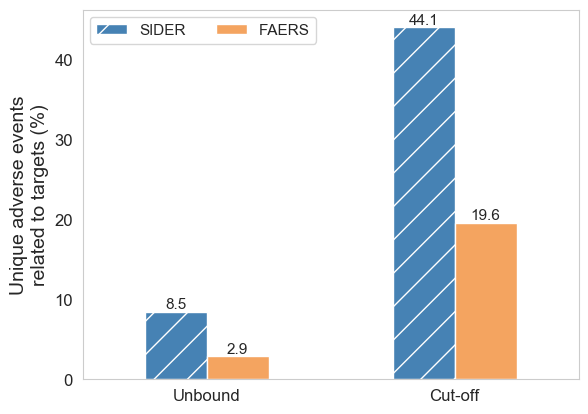

In [11]:
sns.set_style("whitegrid", {'axes.grid' : False})
index = ['Unbound', 'Cut-off']
df = pd.DataFrame({'SIDER': sider_percs, 'FAERS': faers_percs}, index=index)
ax = df.plot.bar(rot=0, fontsize=12, color=['steelblue', 'sandybrown'])
ax.set_ylabel('Unique adverse events\nrelated to targets (%)', fontsize=14)

for p in ax.patches: 
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=11)

# Define some hatches
hatches = {}
hatches[0] = '/'
hatches[1] = '/'
hatches[2] = ''
hatches[3] = ''
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax.legend(ncol=2, fontsize=11)

plt.savefig(basedir + f'/analysis/results/overarching/Cutoff_vs_unbound_AEs_sign_to_targets_bar.png', bbox_inches='tight', dpi=150) 

In [12]:
faers_all_unbound_merged = faers_all_unbound.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')
sider_all_unbound_merged = sider_all_unbound.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')

faers_all_cutoff_merged = faers_all_cutoff.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')
sider_all_cutoff_merged = sider_all_cutoff.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')

faers_sign_unbound_merged = faers_sign_unbound.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')
sider_sign_unbound_merged = sider_sign_unbound.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')

faers_sign_cutoff_merged = faers_sign_cutoff.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')
sider_sign_cutoff_merged = sider_sign_cutoff.merge(meddra_hier_selection, left_on='Adverse Event', right_on=' Term')

In [13]:
def make_summary_df(all_df, sign_df):
    data = dict()
    
    for soc in list(all_df['SOC'].drop_duplicates()):
        all_aes = len(all_df.loc[all_df['SOC']==soc,'Adverse Event'].drop_duplicates())
        sign_aes = len(sign_df.loc[sign_df['SOC']==soc,'Adverse Event'].drop_duplicates())
        sign_aes_perc = (sign_aes / all_aes) * 100
        data[soc] = {'SOC': soc, 'Nr AEs': all_aes, 'Adverse events (%)': sign_aes_perc}
    
    return pd.DataFrame.from_dict(data, orient='index')

In [14]:
faers_unbound_df = make_summary_df(faers_all_unbound_merged, faers_sign_unbound_merged)
faers_unbound_df['dataset'] = 'FAERS'

faers_cutoff_df = make_summary_df(faers_all_cutoff_merged, faers_sign_cutoff_merged)
faers_cutoff_df['dataset'] = 'FAERS'

sider_unbound_df = make_summary_df(sider_all_unbound_merged, sider_sign_unbound_merged)
sider_unbound_df['dataset'] = 'SIDER'

sider_cutoff_df = make_summary_df(sider_all_cutoff_merged, sider_sign_cutoff_merged)
sider_cutoff_df['dataset'] = 'SIDER'


In [15]:
unbound_both = pd.concat([faers_unbound_df, sider_unbound_df]).sort_values(by='Adverse events (%)', ascending=False)

In [16]:
unbound_both

,SOC,Nr AEs,Adverse events (%),dataset
Metabolism and nutrition disorders,Metabolism and nutrition disorders,43,20.930233,SIDER
Blood and lymphatic system disorders,Blood and lymphatic system disorders,29,20.689655,SIDER
Vascular disorders,Vascular disorders,36,13.888889,SIDER
"Respiratory, thoracic and mediastinal disorders","Respiratory, thoracic and mediastinal disorders",72,12.500000,SIDER
Endocrine disorders,Endocrine disorders,16,12.500000,SIDER
Nervous system disorders,Nervous system disorders,117,11.965812,SIDER
Metabolism and nutrition disorders,Metabolism and nutrition disorders,90,11.111111,FAERS
General disorders and administration site conditions,General disorders and administration site conditions,72,9.722222,SIDER
Reproductive system and breast disorders,Reproductive system and breast disorders,42,9.523810,SIDER
Renal and urinary disorders,Renal and urinary disorders,43,9.302326,SIDER


In [17]:
cutoff_both = pd.concat([faers_cutoff_df, sider_cutoff_df])

In [18]:
cutoff_both

,SOC,Nr AEs,Adverse events (%),dataset
Investigations,Investigations,314,8.598726,FAERS
Infections and infestations,Infections and infestations,283,16.961131,FAERS
Cardiac disorders,Cardiac disorders,112,29.464286,FAERS
General disorders and administration site conditions,General disorders and administration site conditions,215,15.348837,FAERS
Nervous system disorders,Nervous system disorders,270,11.111111,FAERS
Gastrointestinal disorders,Gastrointestinal disorders,271,27.306273,FAERS
Musculoskeletal and connective tissue disorders,Musculoskeletal and connective tissue disorders,156,43.589744,FAERS
"Congenital, familial and genetic disorders","Congenital, familial and genetic disorders",52,0.000000,FAERS
Eye disorders,Eye disorders,97,21.649485,FAERS
Surgical and medical procedures,Surgical and medical procedures,106,10.377358,FAERS


In [19]:
ordered_nr_aes = []
for SOC in unbound_both['SOC'].drop_duplicates():
    try:
        number = list(unbound_both.loc[(unbound_both['SOC']==SOC)&(unbound_both['dataset']=='SIDER'),'Nr AEs'])[0]
    except IndexError:
        number = 0
    ordered_nr_aes.append(number)
for SOC in unbound_both['SOC'].drop_duplicates():
    try:
        number = list(unbound_both.loc[(unbound_both['SOC']==SOC)&(unbound_both['dataset']=='FAERS'),'Nr AEs'])[0]
    except IndexError:
        number = 0
    ordered_nr_aes.append(number)

ordered_nr_aes_cutoff = []
for SOC in unbound_both['SOC'].drop_duplicates():
    try:
        number = list(cutoff_both.loc[(cutoff_both['SOC']==SOC)&(cutoff_both['dataset']=='SIDER'),'Nr AEs'])[0]
    except IndexError:
        number = 0
    ordered_nr_aes_cutoff.append(number)
for SOC in unbound_both['SOC'].drop_duplicates():
    try:
        number = list(cutoff_both.loc[(cutoff_both['SOC']==SOC)&(cutoff_both['dataset']=='FAERS'),'Nr AEs'])[0]
    except IndexError:
        number = 0
    ordered_nr_aes_cutoff.append(number)


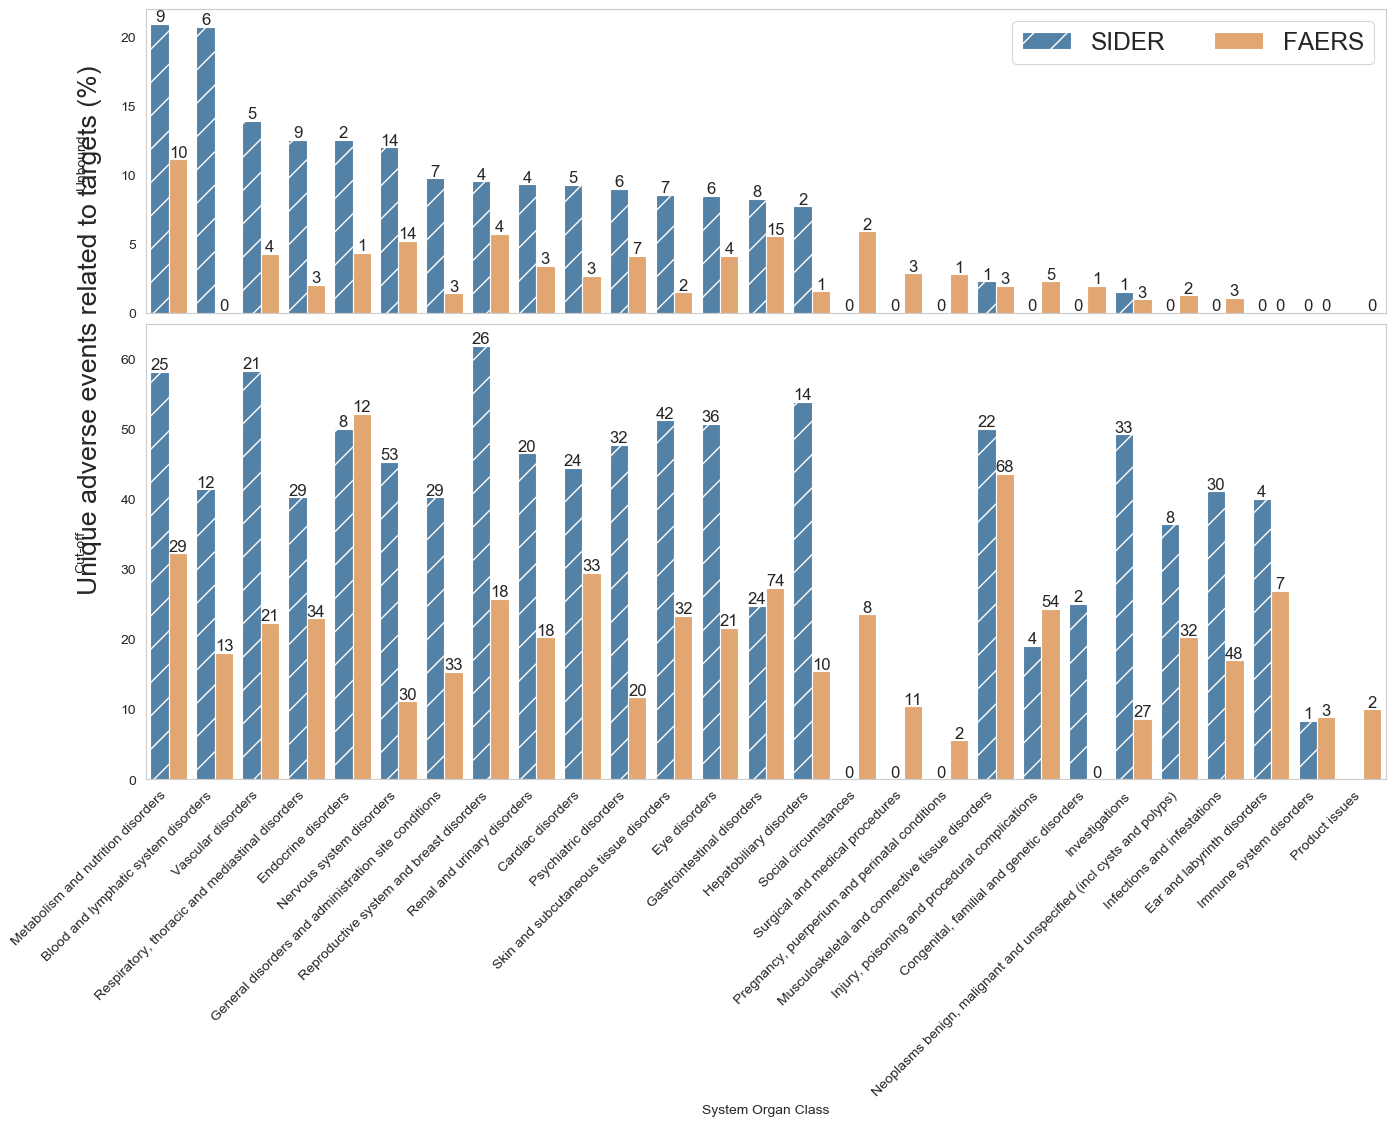

In [20]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(16,10), gridspec_kw={'width_ratios': [1], 'height_ratios': [1,1.5]})
sns.set_style('whitegrid', {'axes.grid' : True, 'xtick.bottom': True, 'axes.spines.right': False, 'axes.spines.top': False})

sns.set_context("paper", font_scale = 2)
sns.barplot(data=unbound_both, y='Adverse events (%)', x='SOC', hue='dataset', ax=ax1, order=list(unbound_both['SOC'].drop_duplicates()), hue_order=['SIDER', 'FAERS'], palette=['steelblue','sandybrown'])
#ax1.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(ax1.get_xticklabels(), visible=False)

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = '/'
for i in np.arange(27,54,step=1):
    hatches[i] = ''
# Loop over the bars
for i,thisbar in enumerate(ax1.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax1.legend().set_title('')

for nr, p in zip(ordered_nr_aes, ax1.patches): 
    ax1.annotate('{:.0f}'.format(nr*(p.get_height()/100),nr), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)


sns.barplot(data=cutoff_both, y='Adverse events (%)', x='SOC', hue='dataset', ax=ax2, order=list(unbound_both['SOC'].drop_duplicates()), hue_order=['SIDER', 'FAERS'], palette=['steelblue','sandybrown'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

for nr, p in zip(ordered_nr_aes_cutoff, ax2.patches): 
    ax2.annotate('{:.0f}'.format(nr*(p.get_height()/100),nr), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = '/'
for i in np.arange(27,54,step=1):
    hatches[i] = ''
# Loop over the bars
for i,thisbar in enumerate(ax2.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax1.legend(loc=1, ncol=2)
ax2.legend().set_visible(False)

ax1.set_xlabel('')
ax2.set_xlabel('System Organ Class')

ax1.set_ylabel('Unbound\n\n')
ax2.set_ylabel('Cut-off\n\n')

f.subplots_adjust(hspace=0.03)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14, bbox_to_anchor=(0.2,1.85), ncol=2)

f.text(0.09, 0.3, 'Unique adverse events related to targets (%)', ha='center', rotation=90)

plt.savefig(basedir + f'/analysis/results/overarching/Cutoff_vs_unbound_AEs_sign_to_targets_bar_bySOC.png', bbox_inches='tight', dpi=150) 

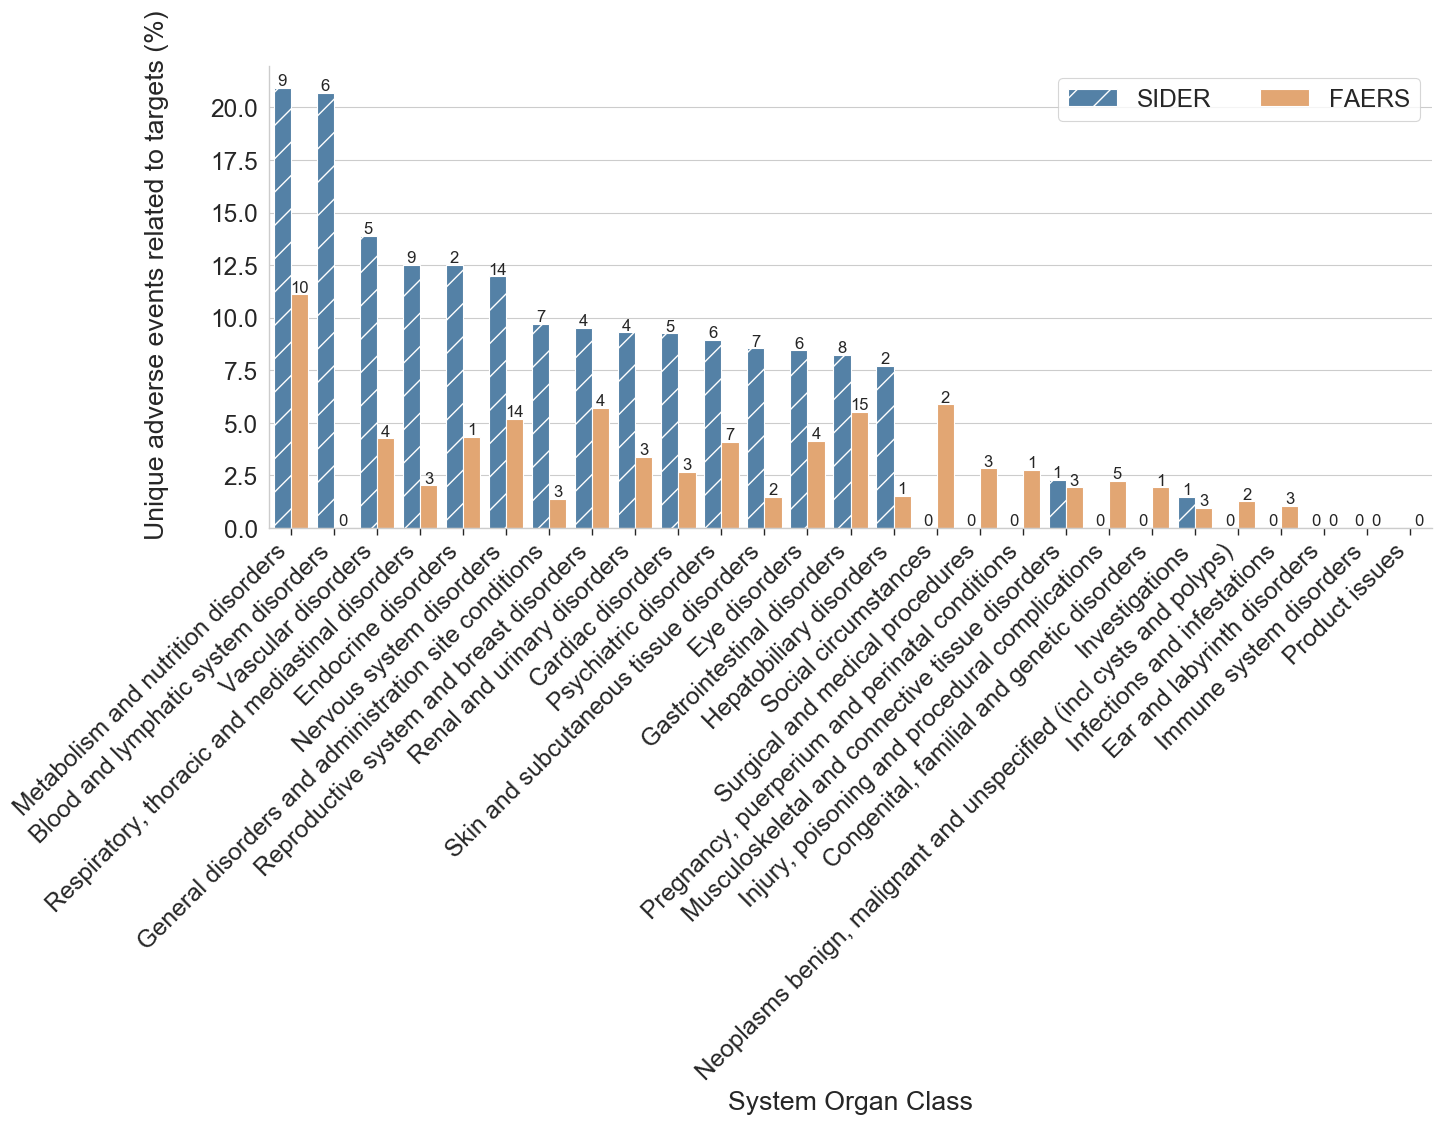

In [21]:
f, (ax1) = plt.subplots(1,1, figsize=(15,6))
sns.set_style('whitegrid', {'axes.grid' : True, 'xtick.bottom': True, 'axes.spines.right': False, 'axes.spines.top': False})

sns.set_context("paper", font_scale = 2)
sns.barplot(data=unbound_both, y='Adverse events (%)', x='SOC', hue='dataset', ax=ax1, order=list(unbound_both['SOC'].drop_duplicates()), hue_order=['SIDER', 'FAERS'], palette=['steelblue','sandybrown'])
#ax1.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')


# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = '/'
for i in np.arange(27,54,step=1):
    hatches[i] = ''
# Loop over the bars
for i,thisbar in enumerate(ax1.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax1.legend().set_title('')

for nr, p in zip(ordered_nr_aes, ax1.patches): 
    ax1.annotate('{:.0f}'.format(nr*(p.get_height()/100),nr), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

#sns.barplot(data=cutoff_both, y='Adverse events (%)', x='SOC', hue='dataset', ax=ax2, order=list(unbound_both['SOC'].drop_duplicates()), hue_order=['SIDER', 'FAERS'], palette=['steelblue','sandybrown'])
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

#for nr, p in zip(ordered_nr_aes_cutoff, ax2.patches): 
#    ax2.annotate('{:.0f}'.format(nr*(p.get_height()/100),nr), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Define some hatches
# hatches = {}
# for i in np.arange(0,27,step=1):
#     hatches[i] = '/'
# for i in np.arange(27,54,step=1):
#     hatches[i] = ''
# # Loop over the bars
# for i,thisbar in enumerate(ax2.patches):
#     # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i])

ax1.legend(loc=1, ncol=2)
#ax2.legend().set_visible(False)

ax1.set_ylabel('')
ax1.set_xlabel('System Organ Class')

#ax1.set_ylabel('Unbound\n\n')

#f.subplots_adjust(hspace=0.03)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14, bbox_to_anchor=(0.2,1.85), ncol=2)

f.text(0.05, 0.1, 'Unique adverse events related to targets (%)', ha='center', rotation=90)

plt.savefig(basedir + f'/analysis/results/overarching/Unbound_AEs_sign_to_targets_bar_bySOC.png', bbox_inches='tight', dpi=150) 

In [22]:
unbound_both

,SOC,Nr AEs,Adverse events (%),dataset
Metabolism and nutrition disorders,Metabolism and nutrition disorders,43,20.930233,SIDER
Blood and lymphatic system disorders,Blood and lymphatic system disorders,29,20.689655,SIDER
Vascular disorders,Vascular disorders,36,13.888889,SIDER
"Respiratory, thoracic and mediastinal disorders","Respiratory, thoracic and mediastinal disorders",72,12.500000,SIDER
Endocrine disorders,Endocrine disorders,16,12.500000,SIDER
Nervous system disorders,Nervous system disorders,117,11.965812,SIDER
Metabolism and nutrition disorders,Metabolism and nutrition disorders,90,11.111111,FAERS
General disorders and administration site conditions,General disorders and administration site conditions,72,9.722222,SIDER
Reproductive system and breast disorders,Reproductive system and breast disorders,42,9.523810,SIDER
Renal and urinary disorders,Renal and urinary disorders,43,9.302326,SIDER


### Distribution of unique AEs distribution across SOCs, compared to those related to targets

In [51]:
# All AEs

total_nr_unique_aes = len(faers_all_unbound_merged[['Adverse Event','SOC']].drop_duplicates())

counts_soc = faers_all_unbound_merged[['Adverse Event','SOC']].drop_duplicates().groupby('SOC').count()
counts_soc['% AEs'] = (counts_soc['Adverse Event'] / total_nr_unique_aes) * 100
counts_soc['condition'] = 'All unique AEs tested (n={} AEs)'.format(total_nr_unique_aes)

# AEs connected to targets

total_nr_unique_aes_related = len(faers_sign_unbound_merged[['Adverse Event','SOC']].drop_duplicates())

counts_soc_related = faers_sign_unbound_merged[['Adverse Event','SOC']].drop_duplicates().groupby('SOC').count()
counts_soc_related['% AEs'] = (counts_soc_related['Adverse Event'] / total_nr_unique_aes_related) * 100
counts_soc_related['condition'] = 'Unique AEs with significant target(s) (n={} AEs)'.format(total_nr_unique_aes_related)


In [52]:
combined_df_faers = pd.concat([counts_soc, counts_soc_related]).reset_index(drop=False)

In [53]:
SOC_order = list(counts_soc.sort_values(by='% AEs', ascending=False).index)

In [54]:
combined_df_faers['SOC'] = combined_df_faers['SOC'].astype('category')
combined_df_faers['SOC'].cat.set_categories(SOC_order, inplace=True)

In [55]:
combined_df_faers

,SOC,Adverse Event,% AEs,condition
0,Blood and lymphatic system disorders,72,2.139673,All unique AEs tested (n=3365 AEs)
1,Cardiac disorders,112,3.328380,All unique AEs tested (n=3365 AEs)
2,"Congenital, familial and genetic disorders",52,1.545319,All unique AEs tested (n=3365 AEs)
3,Ear and labyrinth disorders,26,0.772660,All unique AEs tested (n=3365 AEs)
4,Endocrine disorders,23,0.683507,All unique AEs tested (n=3365 AEs)
5,Eye disorders,97,2.882615,All unique AEs tested (n=3365 AEs)
6,Gastrointestinal disorders,271,8.053492,All unique AEs tested (n=3365 AEs)
7,General disorders and administration site conditions,215,6.389302,All unique AEs tested (n=3365 AEs)
8,Hepatobiliary disorders,65,1.931649,All unique AEs tested (n=3365 AEs)
9,Immune system disorders,34,1.010401,All unique AEs tested (n=3365 AEs)


In [56]:
diffs_faers = counts_soc.merge(counts_soc_related, on='SOC',suffixes=['_all', '_related'])
diffs_faers['diff'] = diffs_faers['% AEs_all'] - diffs_faers['% AEs_related']

In [57]:
diffs_faers.sort_values(by='diff', ascending=False)

,Adverse Event_all,% AEs_all,condition_all,Adverse Event_related,% AEs_related,condition_related,diff
SOC,,,,,,,
Investigations,314,9.331352,All unique AEs tested (n=3365 AEs),3,3.092784,Unique AEs with significant target(s) (n=97 AEs),6.238569
Infections and infestations,283,8.410104,All unique AEs tested (n=3365 AEs),3,3.092784,Unique AEs with significant target(s) (n=97 AEs),5.317321
General disorders and administration site conditions,215,6.389302,All unique AEs tested (n=3365 AEs),3,3.092784,Unique AEs with significant target(s) (n=97 AEs),3.296518
"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",158,4.695394,All unique AEs tested (n=3365 AEs),2,2.061856,Unique AEs with significant target(s) (n=97 AEs),2.633538
Skin and subcutaneous tissue disorders,137,4.071322,All unique AEs tested (n=3365 AEs),2,2.061856,Unique AEs with significant target(s) (n=97 AEs),2.009467
Musculoskeletal and connective tissue disorders,156,4.635958,All unique AEs tested (n=3365 AEs),3,3.092784,Unique AEs with significant target(s) (n=97 AEs),1.543175
"Injury, poisoning and procedural complications",222,6.597325,All unique AEs tested (n=3365 AEs),5,5.154639,Unique AEs with significant target(s) (n=97 AEs),1.442686
"Respiratory, thoracic and mediastinal disorders",148,4.398217,All unique AEs tested (n=3365 AEs),3,3.092784,Unique AEs with significant target(s) (n=97 AEs),1.305433
Hepatobiliary disorders,65,1.931649,All unique AEs tested (n=3365 AEs),1,1.030928,Unique AEs with significant target(s) (n=97 AEs),0.900721


Text(0.5, 0, 'System Organ Class')

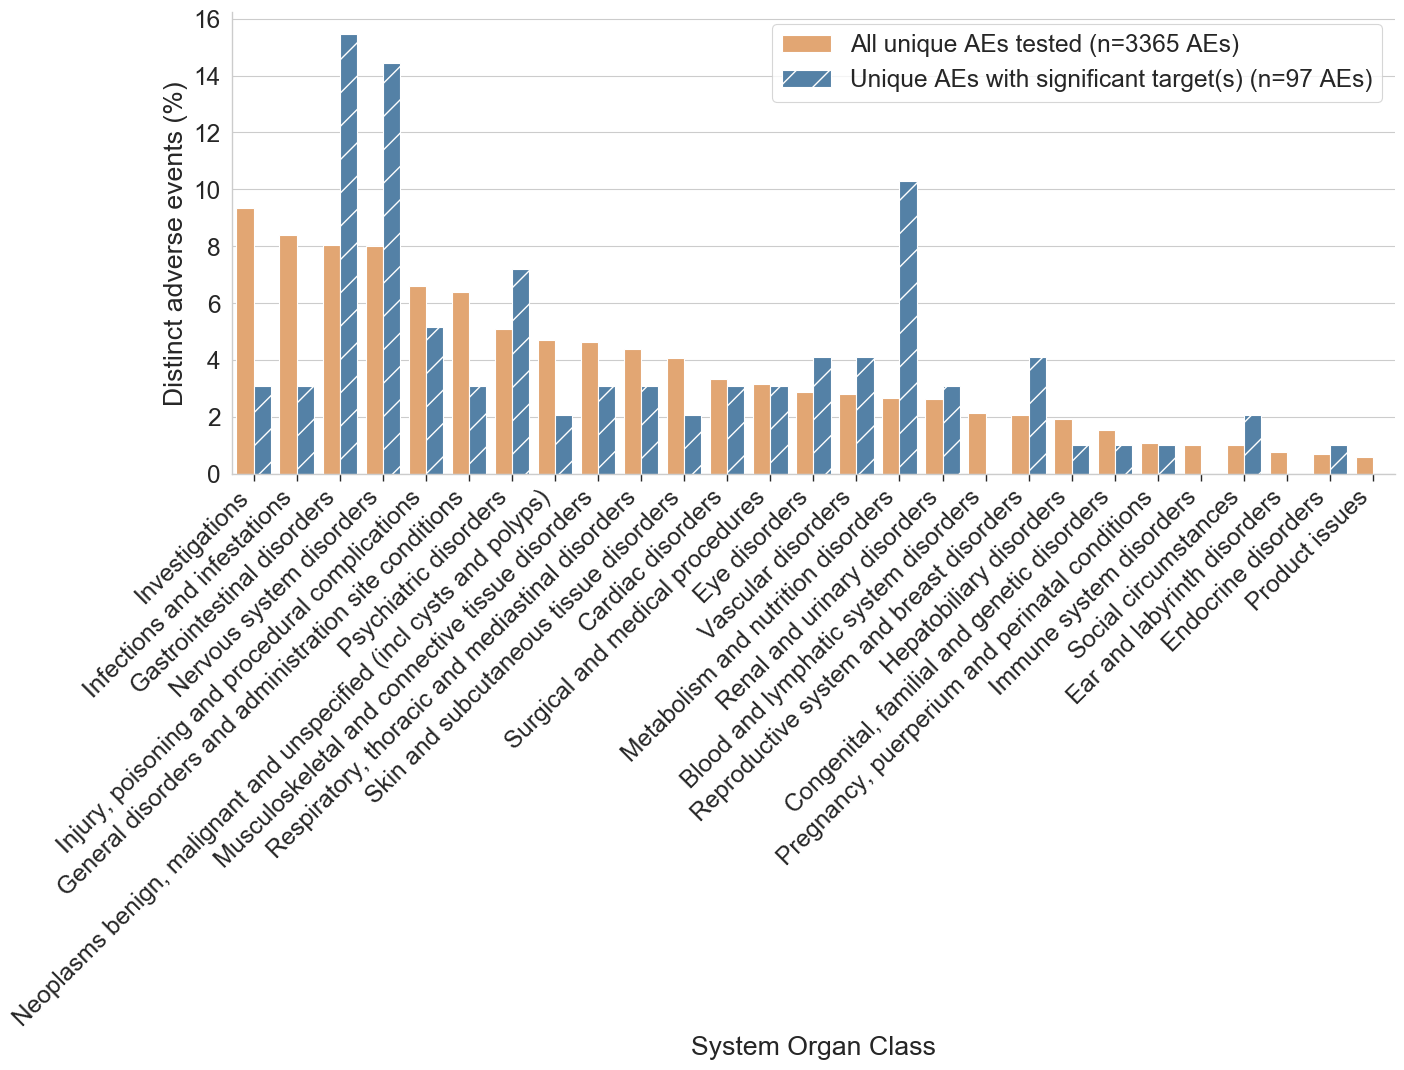

In [58]:
f, (ax1) = plt.subplots(1,1, figsize=(15,6))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)

ax = sns.barplot(data=combined_df_faers, y='% AEs', x='SOC', hue='condition', palette=['sandybrown','steelblue'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = ''
for i in np.arange(27,54,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

ax.legend().set_title('')
ax.legend(loc=1)
ax.set_ylabel('Distinct adverse events (%)')
ax.set_xlabel('System Organ Class')

#current_date = datetime.date.today().strftime("%Y%m%d")
#plt.savefig(f'{project_dir}/figures/{current_date}_AEs_all_bySOC.png', dpi=200, bbox_inches='tight')


In [73]:
### SIDER
# All AEs

total_nr_unique_aes_sider = len(sider_all_unbound_merged[['Adverse Event','SOC']].drop_duplicates())

counts_soc_sider = sider_all_unbound_merged[['Adverse Event','SOC']].drop_duplicates().groupby('SOC').count()
counts_soc_sider['% AEs'] = (counts_soc_sider['Adverse Event'] / total_nr_unique_aes_sider) * 100
counts_soc_sider['condition'] = 'All unique AEs tested (n={} AEs)'.format(total_nr_unique_aes_sider)

# AEs connected to targets

total_nr_unique_aes_sider_related = len(sider_sign_unbound_merged[['Adverse Event','SOC']].drop_duplicates())

counts_soc_sider_related = sider_sign_unbound_merged[['Adverse Event','SOC']].drop_duplicates().groupby('SOC').count()
counts_soc_sider_related['% AEs'] = (counts_soc_sider_related['Adverse Event'] / total_nr_unique_aes_sider_related) * 100
counts_soc_sider_related['condition'] = 'Unique AEs with significant target(s) (n={} AEs)'.format(total_nr_unique_aes_sider_related)


In [74]:
SOC_order_sider = list(counts_soc_sider.sort_values(by='% AEs', ascending=False).index)
combined_df_sider = pd.concat([counts_soc_sider, counts_soc_sider_related]).reset_index(drop=False)
combined_df_sider['SOC'] = combined_df_sider['SOC'].astype('category')
combined_df_sider['SOC'].cat.set_categories(SOC_order_sider, inplace=True)

In [75]:
len(counts_soc_sider)

26

In [76]:
combined_df_sider

,SOC,Adverse Event,% AEs,condition
0,Blood and lymphatic system disorders,29,2.564103,All unique AEs tested (n=1131 AEs)
1,Cardiac disorders,54,4.774536,All unique AEs tested (n=1131 AEs)
2,"Congenital, familial and genetic disorders",8,0.707339,All unique AEs tested (n=1131 AEs)
3,Ear and labyrinth disorders,10,0.884173,All unique AEs tested (n=1131 AEs)
4,Endocrine disorders,16,1.414677,All unique AEs tested (n=1131 AEs)
5,Eye disorders,71,6.277630,All unique AEs tested (n=1131 AEs)
6,Gastrointestinal disorders,97,8.576481,All unique AEs tested (n=1131 AEs)
7,General disorders and administration site conditions,72,6.366048,All unique AEs tested (n=1131 AEs)
8,Hepatobiliary disorders,26,2.298851,All unique AEs tested (n=1131 AEs)
9,Immune system disorders,12,1.061008,All unique AEs tested (n=1131 AEs)


In [77]:
diffs_sider = counts_soc_sider.merge(counts_soc_sider_related, on='SOC',suffixes=['_all', '_related'])
diffs_sider['diff'] = diffs_sider['% AEs_all'] - diffs_sider['% AEs_related']

In [78]:
diffs_sider.sort_values(by='diff', ascending=False)

,Adverse Event_all,% AEs_all,condition_all,Adverse Event_related,% AEs_related,condition_related,diff
SOC,,,,,,,
Investigations,67,5.923961,All unique AEs tested (n=1131 AEs),1,1.041667,Unique AEs with significant target(s) (n=96 AEs),4.882294
Musculoskeletal and connective tissue disorders,44,3.890363,All unique AEs tested (n=1131 AEs),1,1.041667,Unique AEs with significant target(s) (n=96 AEs),2.848696
Gastrointestinal disorders,97,8.576481,All unique AEs tested (n=1131 AEs),8,8.333333,Unique AEs with significant target(s) (n=96 AEs),0.243148
Hepatobiliary disorders,26,2.298851,All unique AEs tested (n=1131 AEs),2,2.083333,Unique AEs with significant target(s) (n=96 AEs),0.215517
Eye disorders,71,6.277630,All unique AEs tested (n=1131 AEs),6,6.250000,Unique AEs with significant target(s) (n=96 AEs),0.027630
Skin and subcutaneous tissue disorders,82,7.250221,All unique AEs tested (n=1131 AEs),7,7.291667,Unique AEs with significant target(s) (n=96 AEs),-0.041446
Psychiatric disorders,67,5.923961,All unique AEs tested (n=1131 AEs),6,6.250000,Unique AEs with significant target(s) (n=96 AEs),-0.326039
Renal and urinary disorders,43,3.801945,All unique AEs tested (n=1131 AEs),4,4.166667,Unique AEs with significant target(s) (n=96 AEs),-0.364721
Cardiac disorders,54,4.774536,All unique AEs tested (n=1131 AEs),5,5.208333,Unique AEs with significant target(s) (n=96 AEs),-0.433798


Text(0.5, 0, 'System Organ Class')

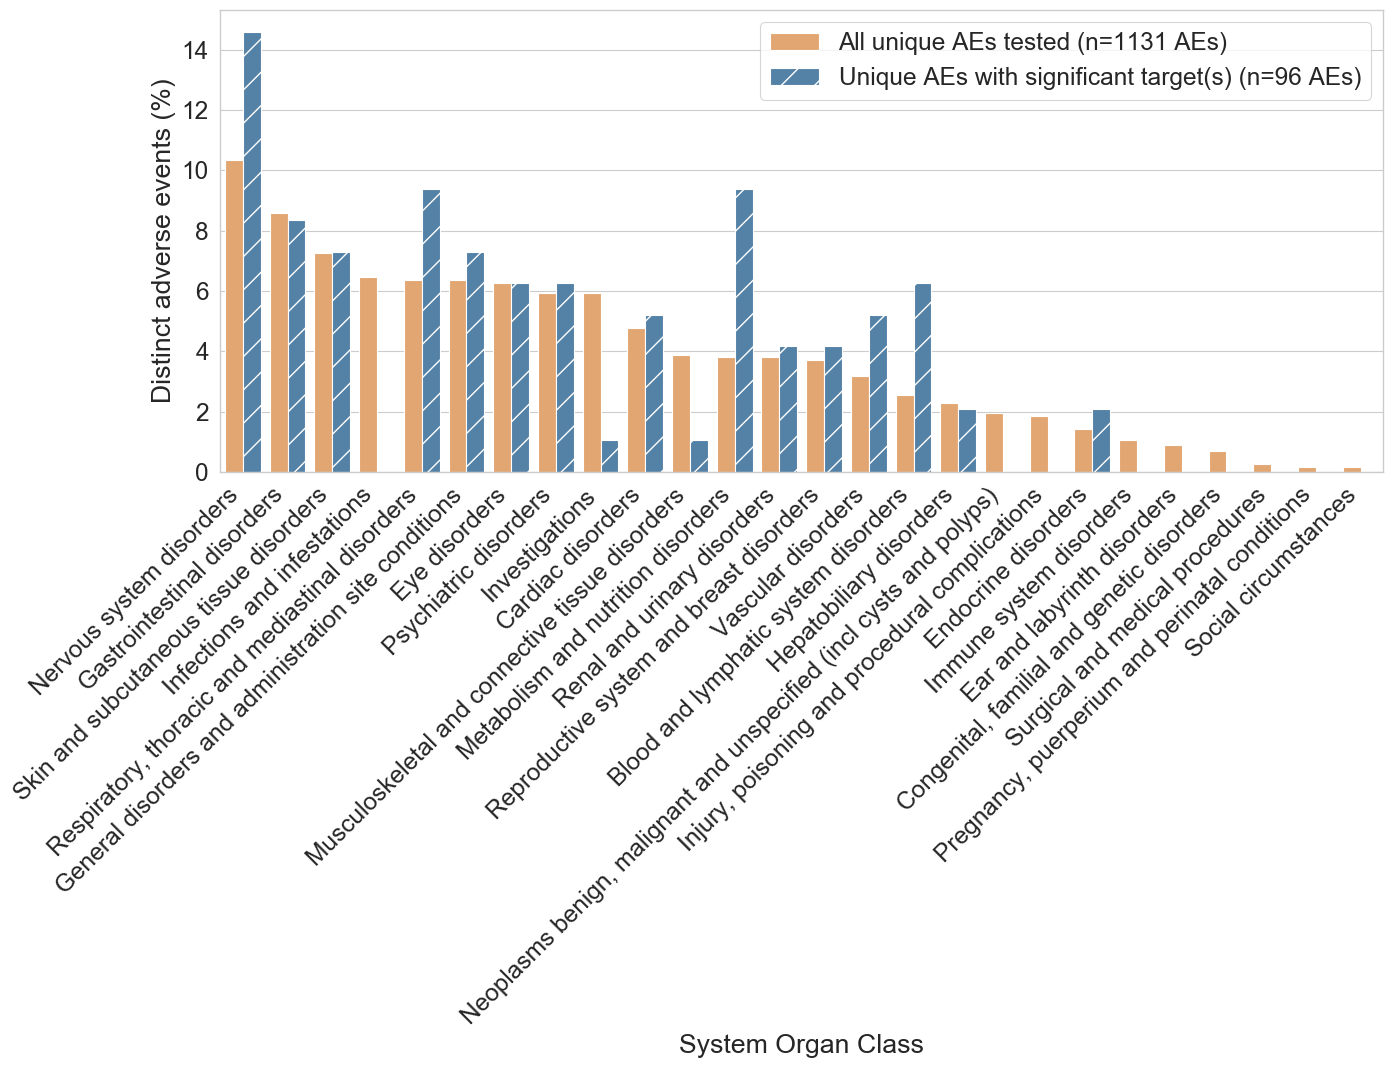

In [79]:
f, (ax1) = plt.subplots(1,1, figsize=(15,6))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)

ax = sns.barplot(data=combined_df_sider,  y='% AEs', x='SOC', hue='condition', palette=['sandybrown','steelblue'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Define some hatches
hatches = {}
for i in np.arange(0,26,step=1):
    hatches[i] = ''
for i in np.arange(26,52,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

ax.legend().set_title('')
ax.legend(loc=1)
ax.set_ylabel('Distinct adverse events (%)')
ax.set_xlabel('System Organ Class')

#current_date = datetime.date.today().strftime("%Y%m%d")
#plt.savefig(f'{project_dir}/figures/{current_date}_AEs_all_bySOC.png', dpi=200, bbox_inches='tight')


In [80]:
combined_df_sider.head()

,SOC,Adverse Event,% AEs,condition
0,Blood and lymphatic system disorders,29,2.564103,All unique AEs tested (n=1131 AEs)
1,Cardiac disorders,54,4.774536,All unique AEs tested (n=1131 AEs)
2,"Congenital, familial and genetic disorders",8,0.707339,All unique AEs tested (n=1131 AEs)
3,Ear and labyrinth disorders,10,0.884173,All unique AEs tested (n=1131 AEs)
4,Endocrine disorders,16,1.414677,All unique AEs tested (n=1131 AEs)


In [68]:
sum(combined_df_faers.loc[combined_df_faers['condition']=='All unique AEs tested (n=3365 AEs)','Adverse Event'])

3365

In [69]:
sum(combined_df_faers.loc[combined_df_faers['condition']=='Unique AEs with significant target(s) (n=97 AEs)','Adverse Event'])

97

In [81]:
sum(combined_df_sider.loc[combined_df_sider['condition']=='All unique AEs tested (n=1131 AEs)','Adverse Event'])

1131

In [82]:
sum(combined_df_sider.loc[combined_df_sider['condition']=='Unique AEs with significant target(s) (n=96 AEs)','Adverse Event'])

96

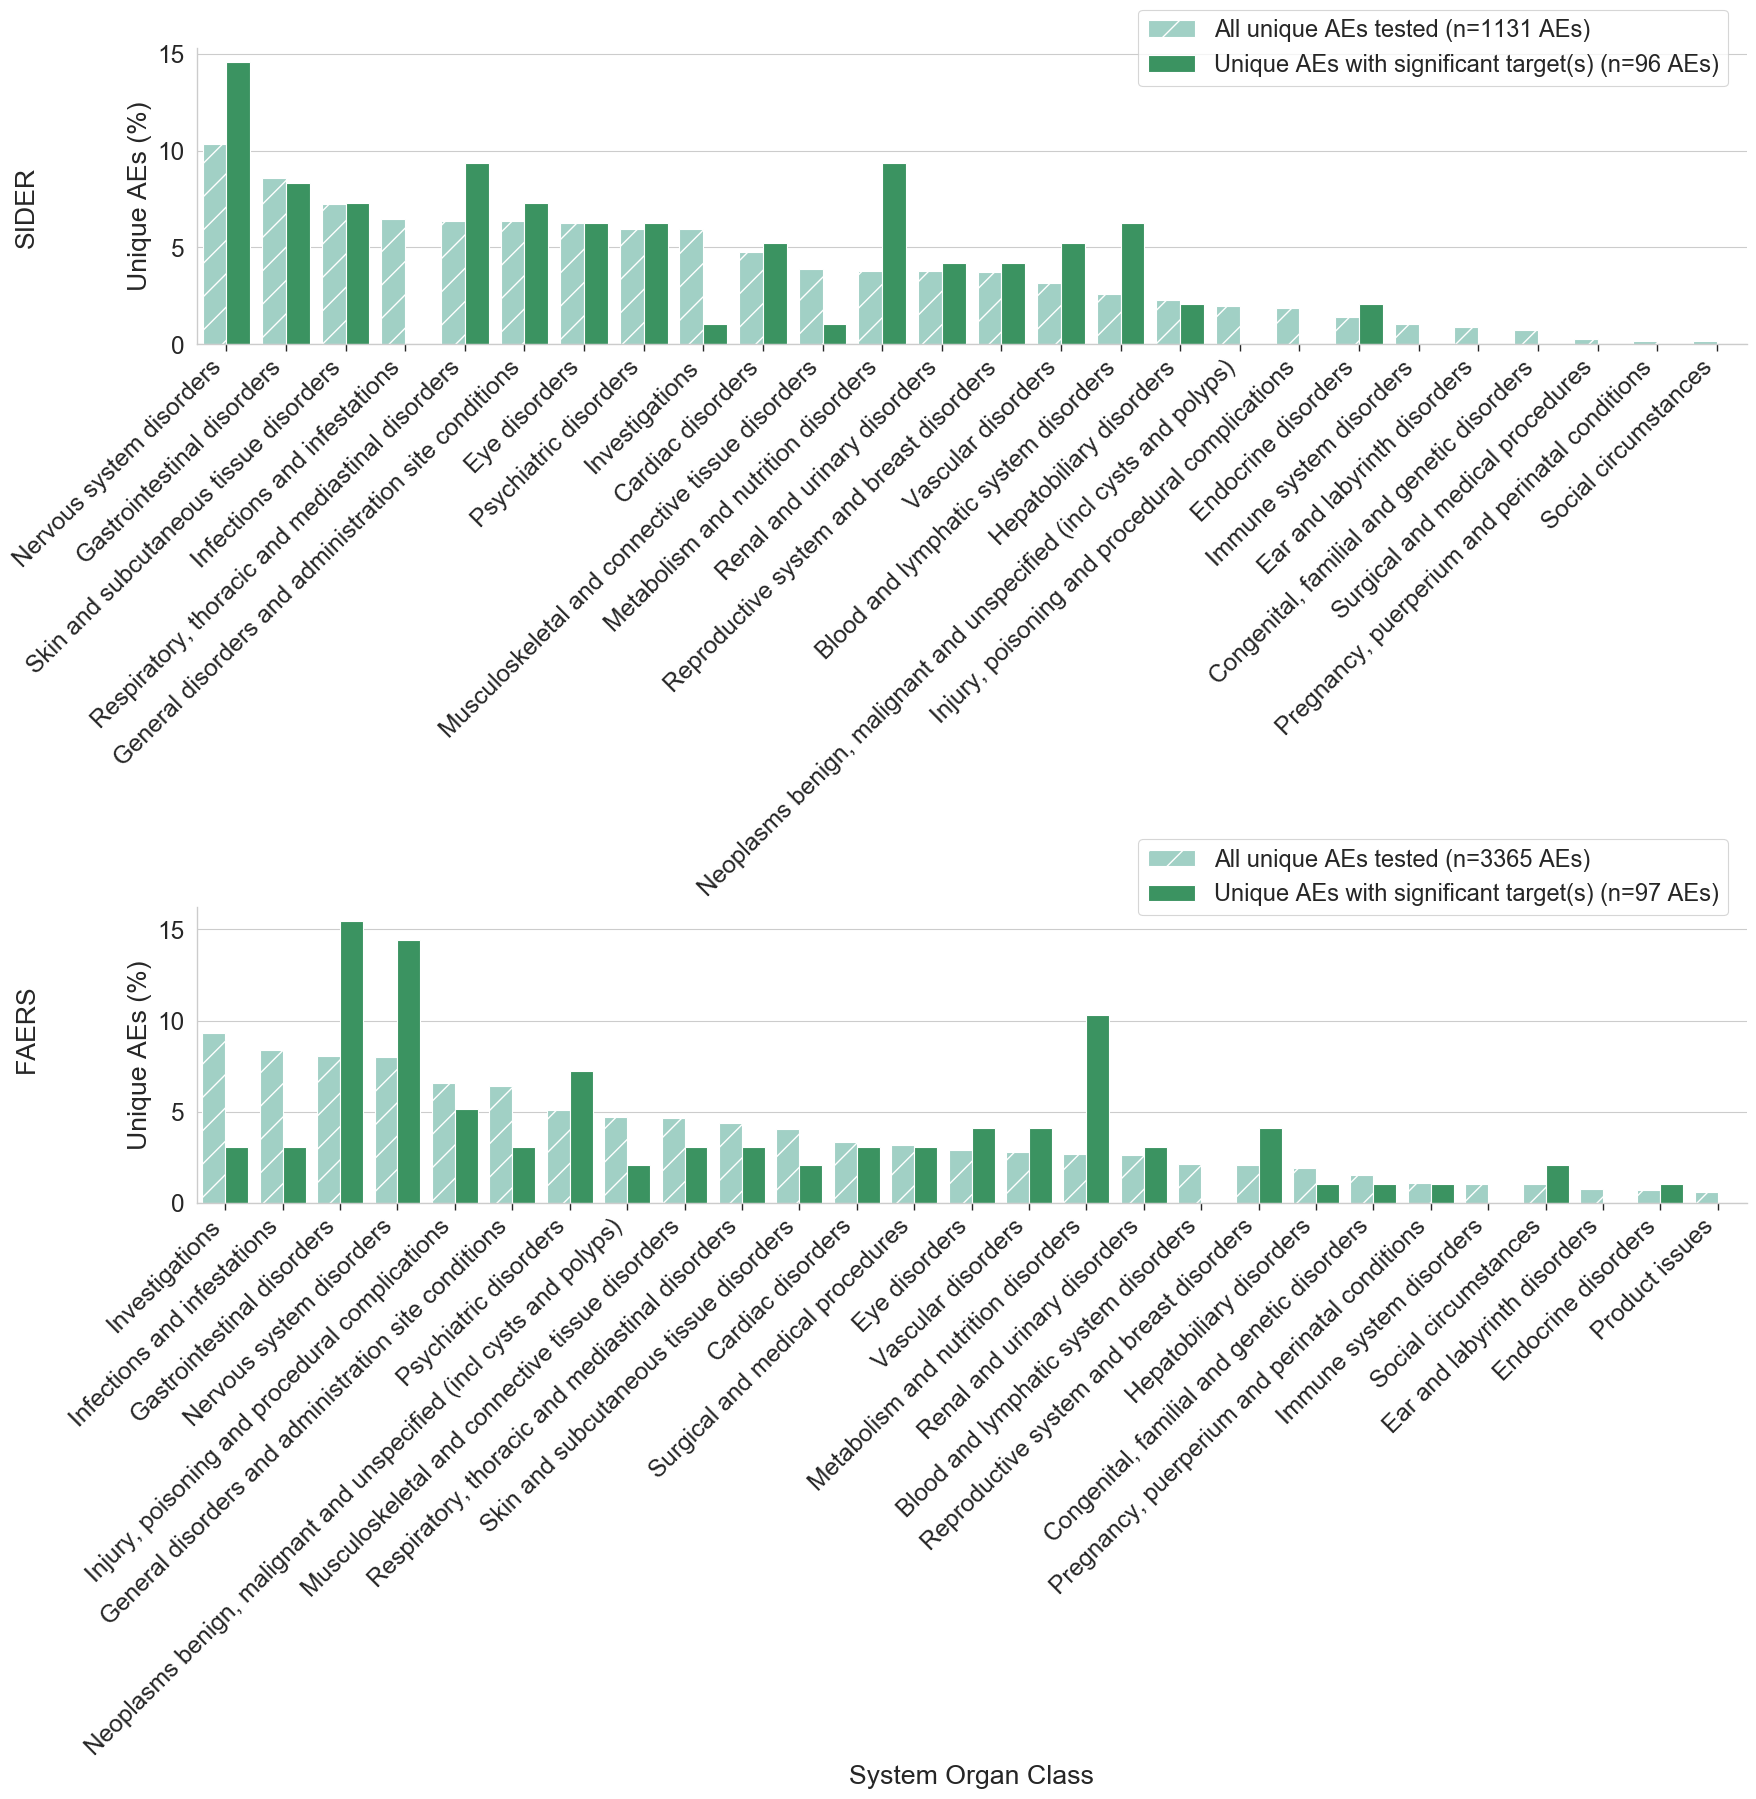

In [85]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,15), gridspec_kw={'height_ratios': [1,1]})
sns.set_style('whitegrid', {'axes.grid' : True, 'xtick.bottom': True, 'axes.spines.right': False, 'axes.spines.top': False})

sns.set_context("paper", font_scale = 2)
sns.barplot(data=combined_df_sider,  y='% AEs', x='SOC', hue='condition', ax=ax1, palette=['#99d8c9','#2ca25f'])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.setp(ax1.get_xticklabels(), visible=False)

# Define some hatches
hatches = {}
for i in np.arange(0,26,step=1):
    hatches[i] = '/'
for i in np.arange(26,52,step=1):
    hatches[i] = ''
# Loop over the bars
for i,thisbar in enumerate(ax1.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax1.legend().set_title('')

# for nr, p in zip(ordered_nr_aes, ax1.patches): 
#     ax1.annotate('{:.0f}'.format(nr*(p.get_height()/100),nr), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

sns.barplot(data=combined_df_faers,  y='% AEs', x='SOC', hue='condition', ax=ax2, palette=['#99d8c9','#2ca25f'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

# for nr, p in zip(ordered_nr_aes_cutoff, ax2.patches): 
#     ax2.annotate('{:.0f}'.format(nr*(p.get_height()/100),nr), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = '/'
for i in np.arange(27,54,step=1):
    hatches[i] = ''
# Loop over the bars
for i,thisbar in enumerate(ax2.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

ax1.legend(loc='center left', bbox_to_anchor=(0.6, 1.0), fontsize=17, ncol=1)
#ax1.legend(loc=1, ncol=1)
#ax2.legend().set_visible(False)
ax2.legend(loc='center left', bbox_to_anchor=(0.6, 1.1), fontsize=17, ncol=1)


ax1.set_xlabel('')
ax2.set_xlabel('System Organ Class')

ax2.set_ylabel('Unique AEs (%)')
ax1.set_ylabel('Unique AEs (%)')

f.subplots_adjust(hspace=1.9)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14, bbox_to_anchor=(0.2,1.85), ncol=2)

f.text(0.04, 0.2, 'FAERS', ha='center', rotation=90)
f.text(0.04, 0.75, 'SIDER', ha='center', rotation=90)

plt.savefig(basedir + f'/analysis/results/overarching/Green_AEs_sign_to_targets_bar_bySOC.png', bbox_inches='tight', dpi=150) 